In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

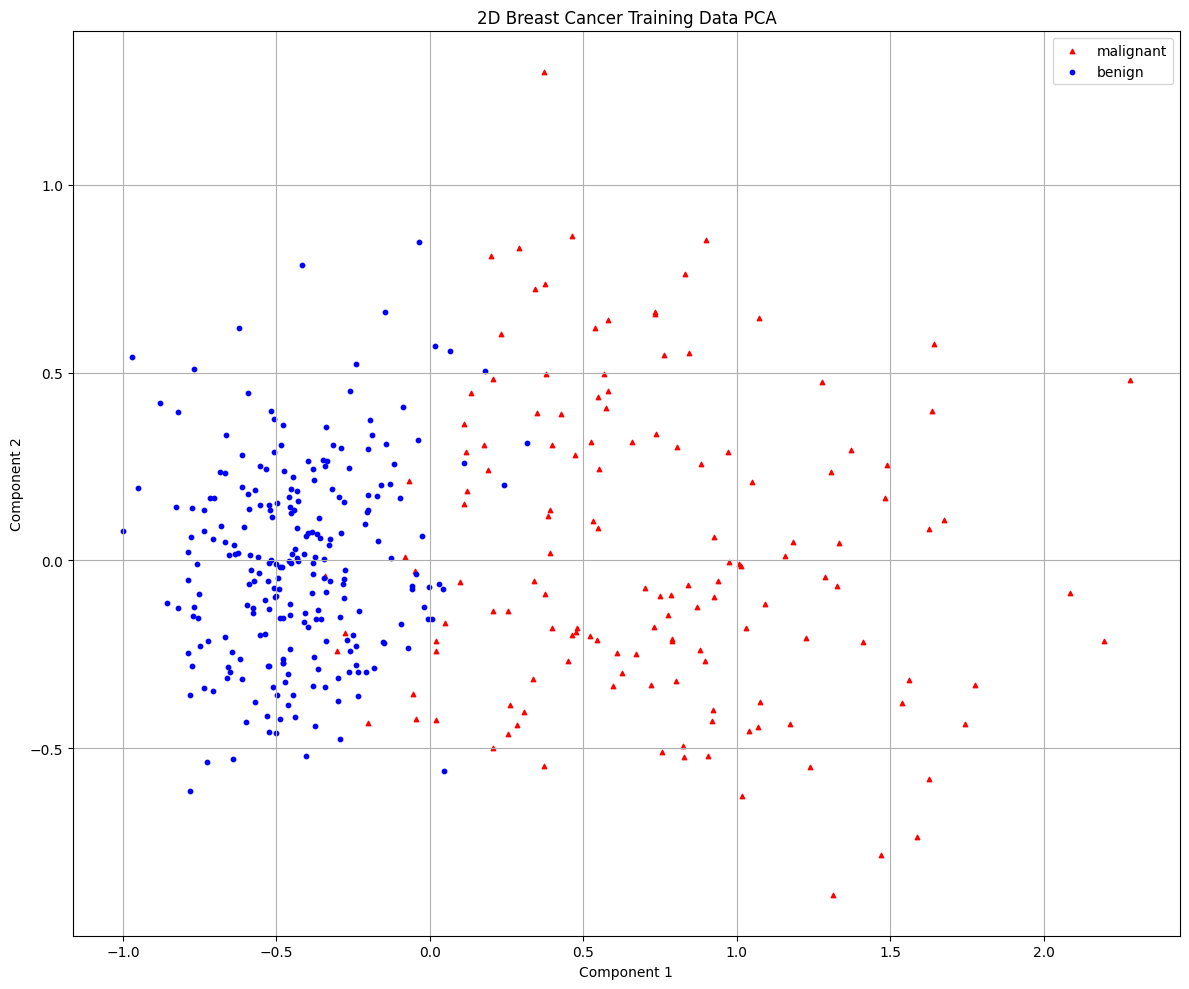

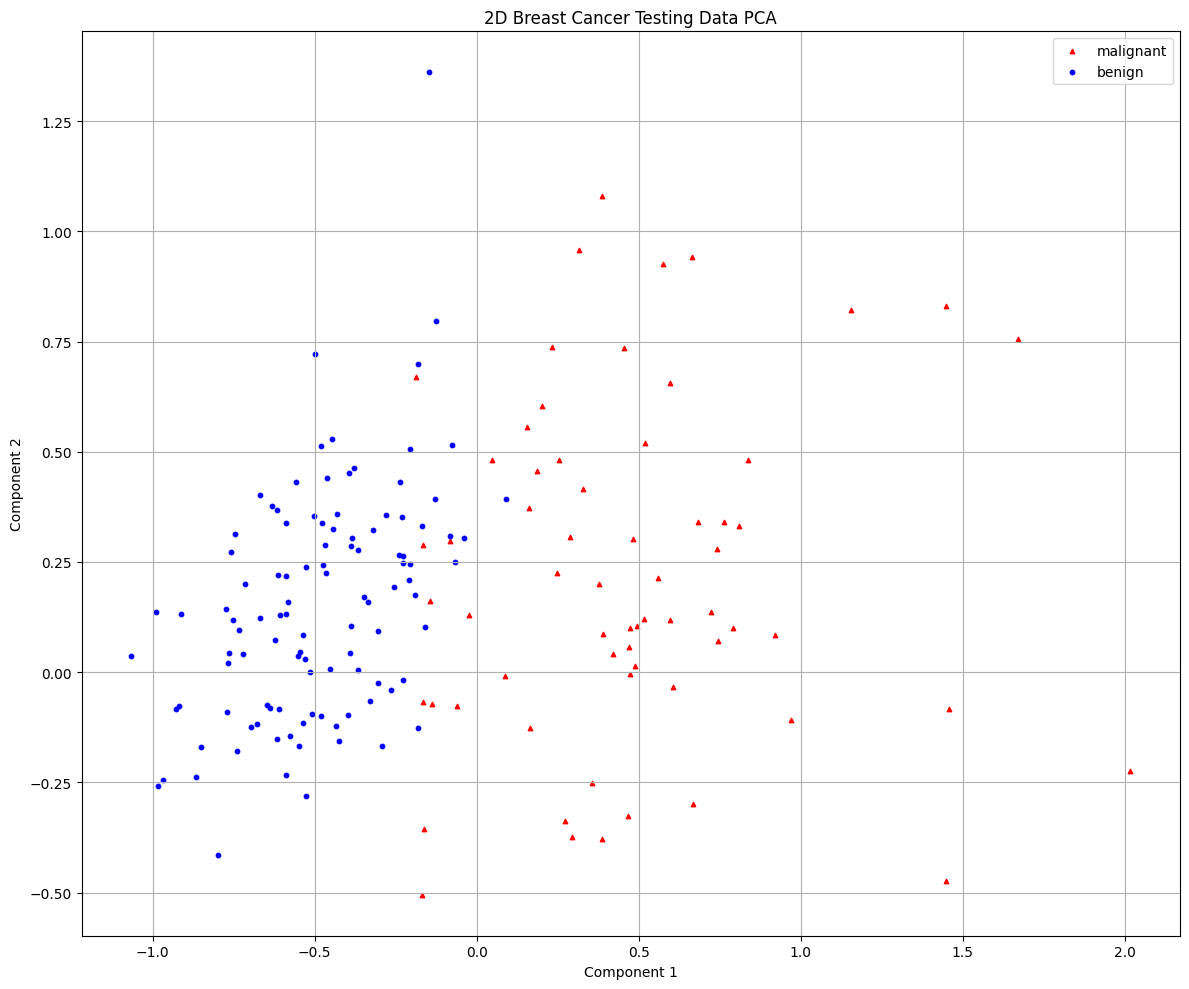

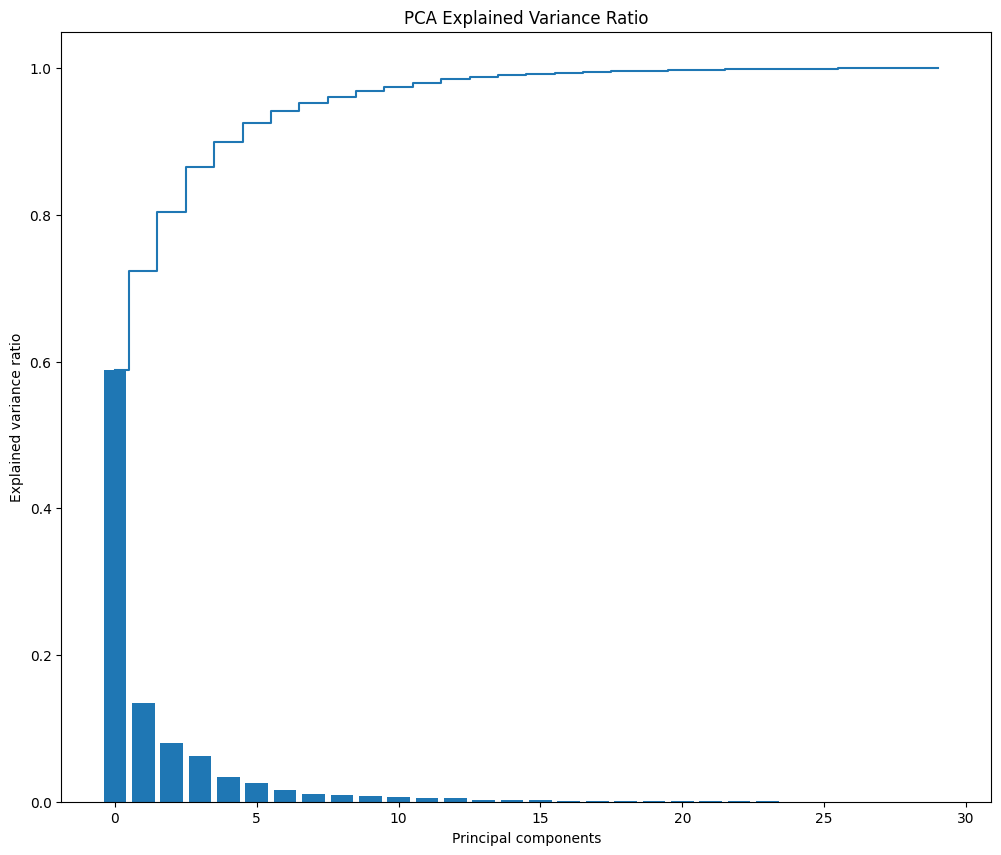

In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

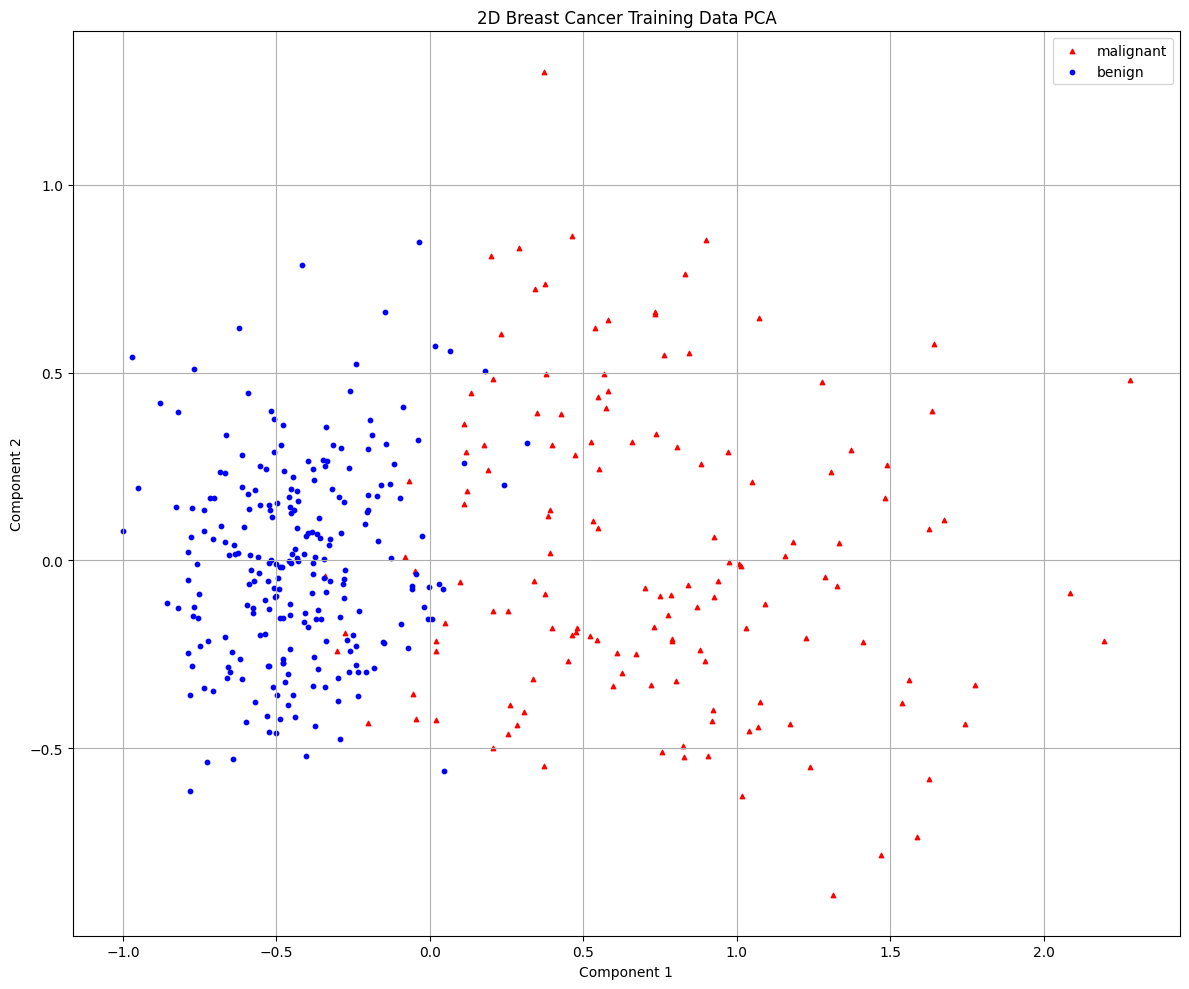

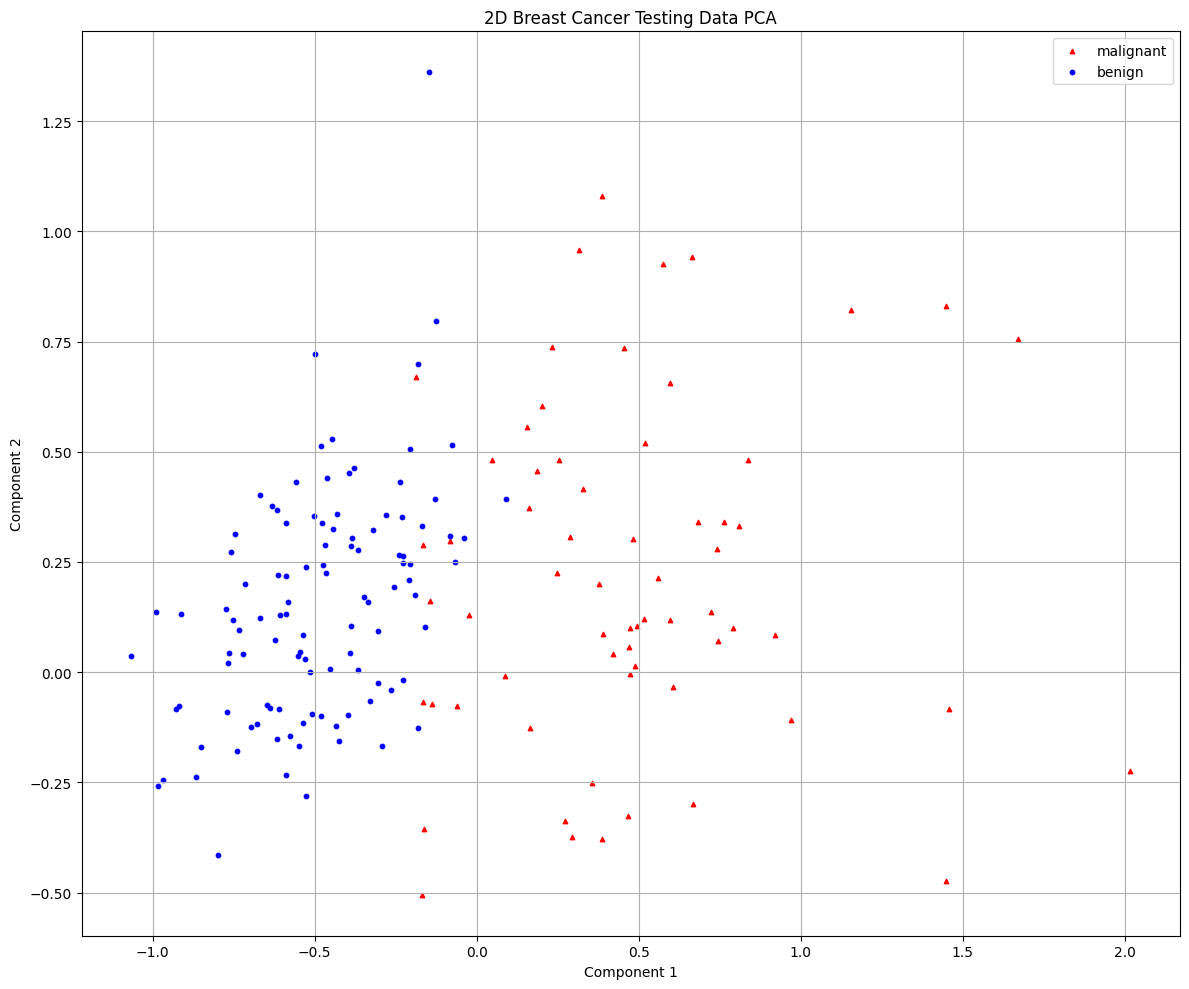

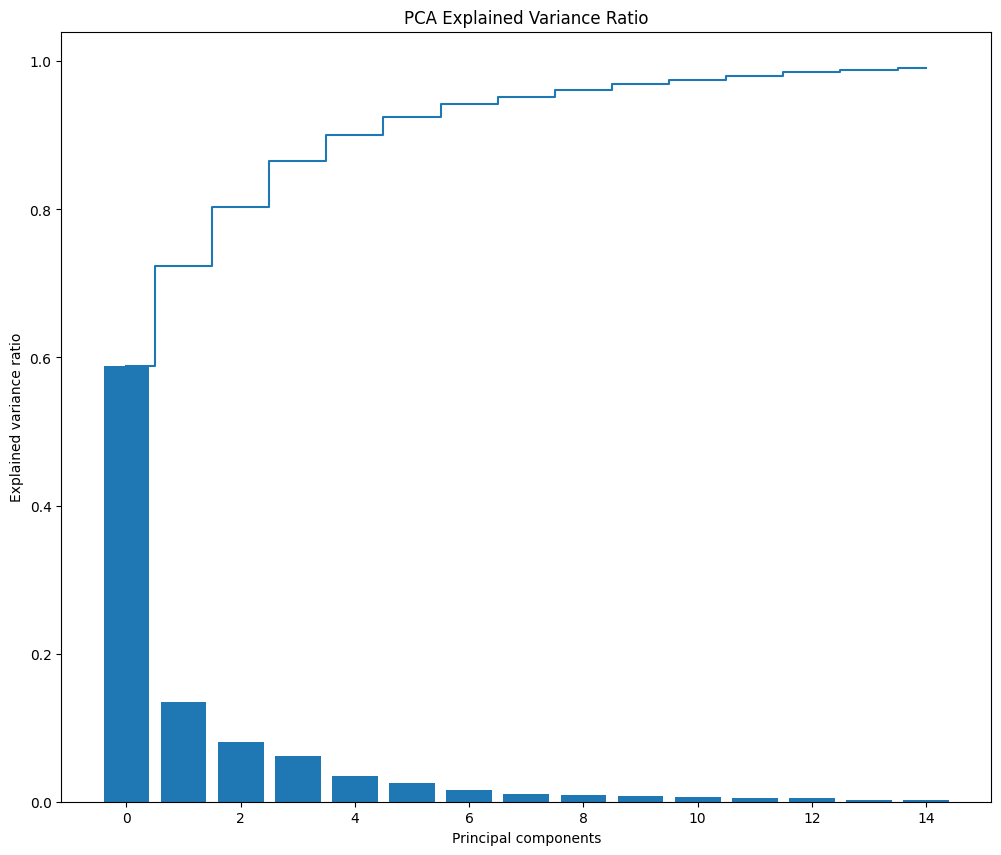

[I 2025-04-27 15:35:10,173] A new study created in memory with name: no-name-cf21e2bc-e3fa-49fc-a05c-4ed1ed956383
[I 2025-04-27 15:35:12,679] Trial 0 finished with value: 0.9657894736842106 and parameters: {'n_estimators': 1074, 'max_depth': 5, 'learning_rate': 0.18730253788922643, 'subsample': 0.7158615143888365, 'colsample_bytree': 0.9320000644495132, 'gamma': 4.921361406078407, 'reg_alpha': 0.28703424229640206, 'reg_lambda': 4.826348267194645e-08}. Best is trial 0 with value: 0.9657894736842106.
[I 2025-04-27 15:35:28,453] Trial 1 finished with value: 0.9552631578947368 and parameters: {'n_estimators': 6528, 'max_depth': 3, 'learning_rate': 0.00693721226777497, 'subsample': 0.9971938502113606, 'colsample_bytree': 0.9423781974600138, 'gamma': 3.3311448097039227, 'reg_alpha': 0.02635050548256634, 'reg_lambda': 0.006369907277439742}. Best is trial 0 with value: 0.9657894736842106.
[I 2025-04-27 15:35:42,552] Trial 2 finished with value: 0.9605263157894737 and parameters: {'n_estimators

Best trial:
Accuracy: 0.9710526315789473
Best hyperparameters:  {'n_estimators': 6136, 'max_depth': 13, 'learning_rate': 0.034734779965873326, 'subsample': 0.8792868198751757, 'colsample_bytree': 0.8450602891741588, 'gamma': 4.442295637137664, 'reg_alpha': 1.482472652884719e-08, 'reg_lambda': 5.263999774306117e-05}


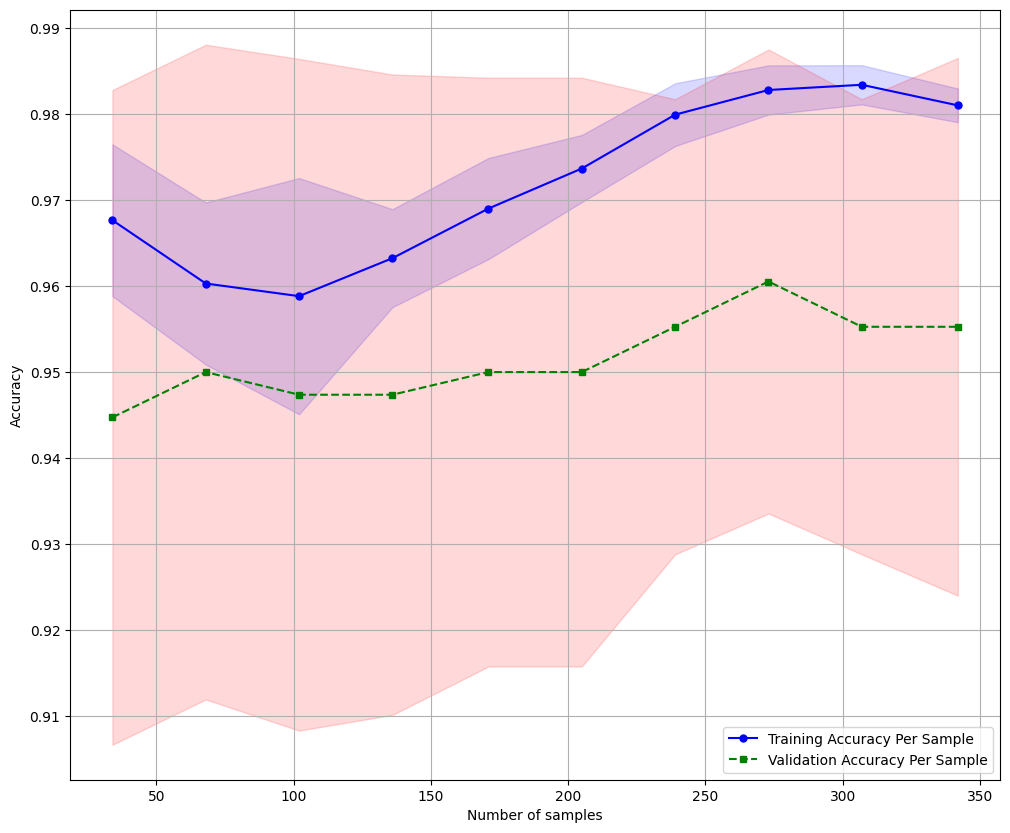

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9867


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)